In [2]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

C:\Users\User\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x1d2e6ac6e80>)

In [4]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [33]:
#задаем поле
beruf = ['учитель_S']
berufs = []

In [34]:
for word in beruf:
    # проверяем наличие слова в модели 
    if word in model:
        print(word)
        # смотрим на вектор слова 
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
            if i[1] >0.5:
                berufs.append(i[0])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)             
print(berufs)

учитель_S
[ 0.11652024  0.01452256  0.05845907  0.01017113 -0.0927788  -0.0257549
 -0.08726092  0.05530078  0.08454826 -0.0390706 ]
педагог_S 0.6911770105361938
учительница_S 0.6753074526786804
ученик_S 0.6716691255569458
преподаватель_S 0.6707792282104492
воспитатель_S 0.6237852573394775
наставник_S 0.5583474636077881
ученица_S 0.5229167938232422
воспитанник_S 0.5100011825561523
репетитор_S 0.5084261894226074
учащийся_S 0.5073457360267639


['педагог_S', 'учительница_S', 'ученик_S', 'преподаватель_S', 'воспитатель_S', 'наставник_S', 'ученица_S', 'воспитанник_S', 'репетитор_S', 'учащийся_S']


In [36]:
edges = []
for b in berufs:
    edge = (b, beruf[0])
    print(edge)
    edges.append(edge)
print(edges)

('педагог_S', 'учитель_S')
('учительница_S', 'учитель_S')
('ученик_S', 'учитель_S')
('преподаватель_S', 'учитель_S')
('воспитатель_S', 'учитель_S')
('наставник_S', 'учитель_S')
('ученица_S', 'учитель_S')
('воспитанник_S', 'учитель_S')
('репетитор_S', 'учитель_S')
('учащийся_S', 'учитель_S')
[('педагог_S', 'учитель_S'), ('учительница_S', 'учитель_S'), ('ученик_S', 'учитель_S'), ('преподаватель_S', 'учитель_S'), ('воспитатель_S', 'учитель_S'), ('наставник_S', 'учитель_S'), ('ученица_S', 'учитель_S'), ('воспитанник_S', 'учитель_S'), ('репетитор_S', 'учитель_S'), ('учащийся_S', 'учитель_S')]


In [37]:
import networkx as nx

In [52]:
G = nx.Graph()
G.add_nodes_from(beruf)
G.add_edges_from(edges)

In [53]:
print('узлы', G.nodes())
print('рёбра', G.edges())

узлы ['учитель_S', 'педагог_S', 'учительница_S', 'ученик_S', 'преподаватель_S', 'воспитатель_S', 'наставник_S', 'ученица_S', 'воспитанник_S', 'репетитор_S', 'учащийся_S']
рёбра [('учитель_S', 'педагог_S'), ('учитель_S', 'учительница_S'), ('учитель_S', 'ученик_S'), ('учитель_S', 'преподаватель_S'), ('учитель_S', 'воспитатель_S'), ('учитель_S', 'наставник_S'), ('учитель_S', 'ученица_S'), ('учитель_S', 'воспитанник_S'), ('учитель_S', 'репетитор_S'), ('учитель_S', 'учащийся_S')]


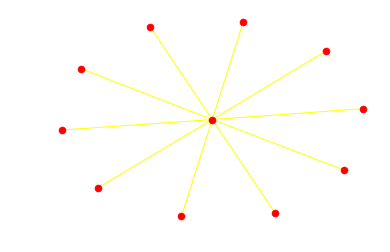

In [54]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

# для начала надо выбрать способ "укладки" графа. Их много, возьмём для начала такой:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

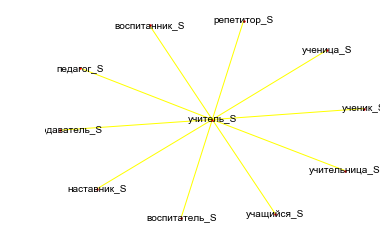

In [55]:
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=3) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

In [ ]:
#shell_layout

In [3]:
plain_text = 'Произвольность_S знака, по поводу которой мы выше допускали теоретическую возможность перемены. Углубляясь в вопрос, мы усматриваем, что в действительности самая произвольность знака защищает язык от всякой попытки, направленной к его изменению. Говорящая масса, будь она даже сознательнее, не могла бы обсуждать вопросы языка. Ведь для того чтобы подвергать обсуждению какую-либо вещь, надо, чтобы она отвечала какой-то разумной норме.'

In [13]:
text = plain_text.split(' ')
print(text)

['Произвольность_S', 'знака,', 'по', 'поводу', 'которой', 'мы', 'выше', 'допускали', 'теоретическую', 'возможность', 'перемены.', 'Углубляясь', 'в', 'вопрос,', 'мы', 'усматриваем,', 'что', 'в', 'действительности', 'самая', 'произвольность', 'знака', 'защищает', 'язык', 'от', 'всякой', 'попытки,', 'направленной', 'к', 'его', 'изменению.', 'Говорящая', 'масса,', 'будь', 'она', 'даже', 'сознательнее,', 'не', 'могла', 'бы', 'обсуждать', 'вопросы', 'языка.', 'Ведь', 'для', 'того', 'чтобы', 'подвергать', 'обсуждению', 'какую-либо', 'вещь,', 'надо,', 'чтобы', 'она', 'отвечала', 'какой-то', 'разумной', 'норме.']


In [21]:
text = ['Произвольность_S', 'знака_S', 'поводу_S', 'которой_P', 'мы_P', 'допускали_V', 'возможность_S', 'перемены_S', 'Углубляясь_V', 'в', 'вопрос,', 'мы', 'усматриваем,', 'что', 'в', 'действительности', 'самая', 'произвольность', 'знака', 'защищает', 'язык', 'от', 'всякой', 'попытки,', 'направленной', 'к', 'его', 'изменению.', 'Говорящая', 'масса,', 'будь', 'она', 'даже', 'сознательнее,', 'не', 'могла', 'бы', 'обсуждать', 'вопросы', 'языка.', 'Ведь', 'для', 'того', 'чтобы', 'подвергать', 'обсуждению', 'какую-либо', 'вещь,', 'надо,', 'чтобы', 'она', 'отвечала', 'какой-то', 'разумной', 'норме.']
   

Произвольность_S
знака,
по
поводу
которой
мы
выше
допускали
теоретическую
возможность
перемены.
Углубляясь
в
вопрос,
мы
усматриваем,
что
в
действительности
самая
произвольность
знака
защищает
язык
от
всякой
попытки,
направленной
к
его
изменению.
Говорящая
масса,
будь
она
даже
сознательнее,
не
могла
бы
обсуждать
вопросы
языка.
Ведь
для
того
чтобы
подвергать
обсуждению
какую-либо
вещь,
надо,
чтобы
она
отвечала
какой-то
разумной
норме.


In [ ]:
обозначаем части речи пропустить через y_morphy

In [ ]:
Взять слово, опредлить все слова которые втречаются на рассмотянии 3 от него и провести свзяь

In [26]:
new_prof = []
for word in prof:
    # проверяем наличие слова в модели 
    if word in model:
        print(word)
        # смотрим на вектор слова 
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
            if i[1] >0.5:
                new_prof.append(i[0])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)
              
print(new_prof)
for i in new_prof:
    prof.append(i)
print(prof)

тракторист_S
[ 0.04066477 -0.09665042 -0.03725966  0.04195219  0.02256406 -0.02936959
 -0.03702025  0.01981226  0.16540398 -0.11574294]
механизатор_S 0.5969146490097046
бригадир_S 0.563754677772522
слесарь_S 0.5596330165863037
шофер_S 0.528299868106842
машинист_S 0.5127851366996765
бульдозерист_S 0.48221683502197266
комбайнер_S 0.4792298972606659
скотник_S 0.47825342416763306
агроном_S 0.4699169993400574
доярка_S 0.45570170879364014


учительница_S
[ 0.06564957  0.00682442 -0.03636581  0.01796682 -0.02466042 -0.09483731
 -0.07061664  0.0051861   0.01592761  0.00070114]
учитель_S 0.6753073930740356
преподавательница_S 0.591582179069519
ученица_S 0.5857758522033691
преподаватель_S 0.5594195127487183
завуч_S 0.5367646217346191
наставница_S 0.5230349898338318
училка_S 0.49467700719833374
воспитательница_S 0.4812968373298645
преподавать_V 0.4752165675163269
педагог_S 0.4691164195537567


актер_S
[ 0.05524576  0.08403965  0.0941639  -0.02058233  0.03977678  0.03826276
 -0.0034423   0.0717479